In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:/Users/Admin/Downloads/final.csv')

# Finding Outliers


<AxesSubplot:xlabel='age'>

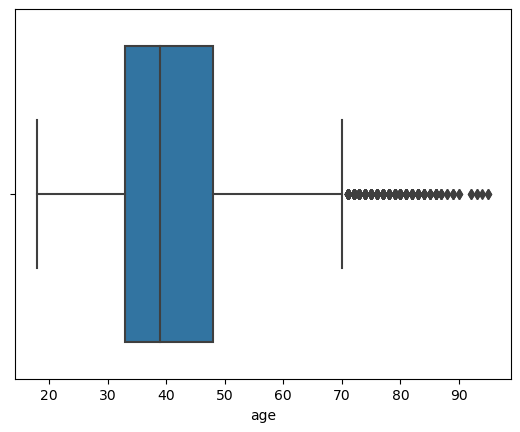

In [3]:
sns.boxplot(x=df['age'])

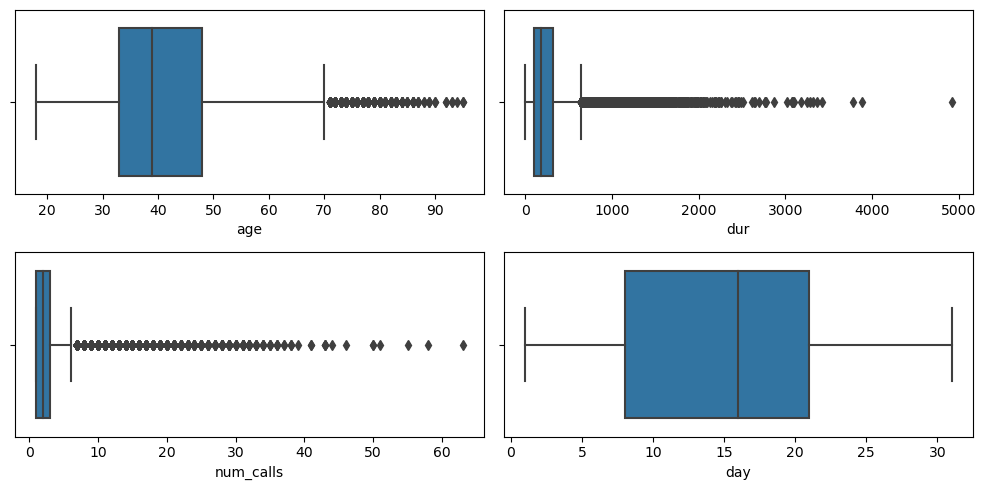

In [4]:
num_vars=['age','dur','num_calls','day']

fig ,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
axs=axs.flatten()




for i,var in enumerate(num_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])


fig.tight_layout()

plt.show()

# using IQR method

In [5]:
q3=df['dur'].quantile(0.75)
q1=df['dur'].quantile(0.25)
iqr=q3-q1

upper_band = q3+(1.5*iqr)
lower_band = q1-(1.5*iqr)

print("upper_band:",upper_band)
print("lower_band:",lower_band)

upper_band: 643.0
lower_band: -221.0


In [6]:
dur_outliers = df[(df.dur<lower_band)|(df.dur>upper_band)]

In [7]:
dur_outliers

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
37,53,technician,married,secondary,unknown,5,may,1666,1,unknown,no
43,54,retired,married,secondary,unknown,5,may,1492,1,unknown,no
53,42,admin.,single,secondary,unknown,5,may,787,1,unknown,no
59,46,services,married,primary,unknown,5,may,1778,1,unknown,no
61,53,technician,divorced,secondary,unknown,5,may,812,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45124,27,blue-collar,single,primary,cellular,26,oct,701,2,unknown,yes
45199,34,blue-collar,single,secondary,cellular,16,nov,1166,3,other,no
45200,38,technician,married,secondary,cellular,16,nov,1556,4,unknown,yes
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes


# remove dur outliers

In [8]:
df=df[(df.dur>lower_band)&(df.dur<upper_band)]

In [9]:
df.shape

(41964, 11)

#  detect age outliers


In [10]:
q3=df['age'].quantile(0.75)
q1=df['age'].quantile(0.25)
iqr=q3-q1

upper_band=q3+(1.5*iqr)
lower_band=q1-(1.5*iqr)

print("upper_band:",upper_band)
print("lower_band:",lower_band)

upper_band: 70.5
lower_band: 10.5


In [12]:
age_outliers = df[(df.age<lower_band)|(df.age>upper_band)]

In [13]:
age_outliers

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
29261,75,retired,divorced,primary,cellular,2,feb,294,1,unknown,no
29263,75,retired,married,primary,cellular,2,feb,149,1,unknown,no
29322,83,retired,married,tertiary,cellular,2,feb,283,2,unknown,no
29865,75,retired,divorced,primary,cellular,4,feb,136,3,unknown,yes
30225,72,retired,married,primary,cellular,5,feb,229,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45141,77,unknown,married,unknown,telephone,8,nov,207,1,success,no
45163,71,retired,married,secondary,cellular,9,nov,379,2,failure,no
45191,75,retired,divorced,tertiary,cellular,16,nov,262,1,failure,yes
45204,73,retired,married,secondary,cellular,17,nov,300,1,failure,yes


In [14]:
# remove age outliers

In [15]:
df=df[(df.age>lower_band)&(df.age<upper_band)]

In [16]:
df.shape

(41531, 11)

In [17]:
# detect outlier num_calls

In [18]:
q3=df['num_calls'].quantile(0.75)
q1=df['num_calls'].quantile(0.25)
iqr = q3-q1

upper_band=q3+(1.5*iqr)
lower_band=q1-(1.5*iqr)

print("lower_band:",lower_band)
print("upper_band:",upper_band)

lower_band: -2.0
upper_band: 6.0


In [19]:
num_calls_outliers = df[(df.num_calls<lower_band)|(df.num_calls>upper_band)]

In [20]:
num_calls_outliers

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
758,59,services,married,secondary,unknown,6,may,250,7,unknown,no
780,30,admin.,married,secondary,unknown,7,may,172,8,unknown,no
906,27,services,single,secondary,unknown,7,may,388,7,unknown,no
1103,52,technician,married,unknown,unknown,7,may,253,8,unknown,no
1105,43,admin.,married,tertiary,unknown,7,may,244,7,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
44594,34,technician,single,tertiary,cellular,23,aug,220,16,other,no
44666,25,technician,single,secondary,cellular,2,sep,206,7,other,no
44680,27,self-employed,single,tertiary,telephone,3,sep,543,9,failure,no
44770,37,services,single,tertiary,cellular,13,sep,323,9,other,yes


In [21]:
# removing num_calls_outliers

In [22]:
df=df[(df.num_calls>lower_band)&(df.num_calls<upper_band)]

In [23]:
df.shape

(37449, 11)

# remove outliers


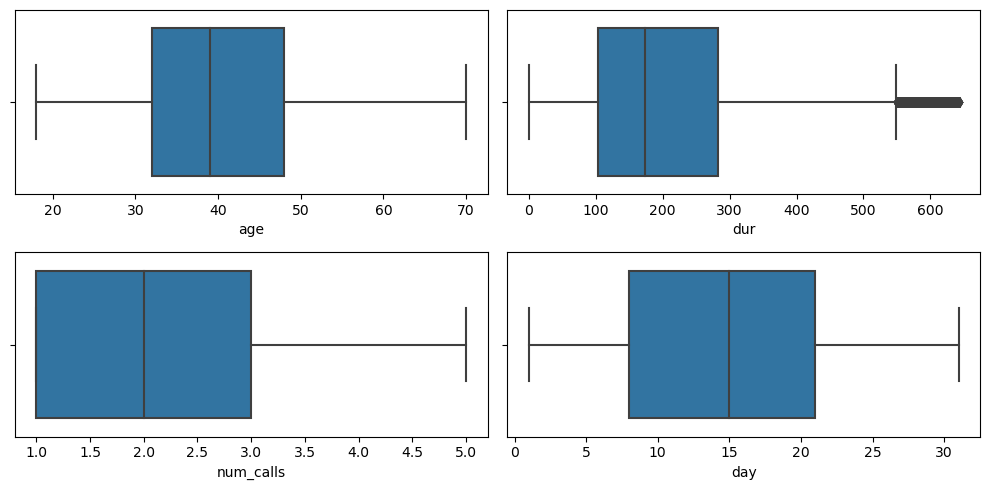

In [24]:
num_vars1=['age','dur','num_calls','day']

fig ,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
axs=axs.flatten()




for i,var in enumerate(num_vars1):
    sns.boxplot(x=var,data=df,ax=axs[i])


fig.tight_layout()

plt.show()

In [ ]:
S